Geospatial - May Trip Data

In [3]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

Read in May trip data

In [4]:
maytrips = pd.read_csv('../data/may_trip.csv')
print(maytrips.shape)
maytrips.head(3)

(224969, 16)


,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,2019-05-01 00:00:55.423000,Bird,BRD2134,Powered9EAJL,3.0000,958.00528,2019-05-01 00:00:00,00:00:20.460000,2019-05-01 00:00:00,00:02:52.346666,36.15710,-86.80360,36.15660,-86.80670,"[[36.157235,-86.803612],[36.157235,-86.80362],...",2019-05-02 05:30:23.780000
1,2019-05-01 00:03:33.147000,Lyft,LFT5,Powered296631,1.7156,1371.39112,2019-05-01 00:00:00,00:01:50.090000,2019-05-01 00:00:00,00:03:33.026666,36.15797,-86.77896,36.16054,-86.77689,"[[36.15797,-86.77896],[36.15795,-86.77873],[36...",2019-05-02 07:20:32.757000
2,2019-05-01 00:05:55.570000,Bird,BRD2168,Powered7S2UU,3.0000,2296.58800,2019-05-01 00:00:00,00:03:47.363333,2019-05-01 00:00:00,00:07:13.596666,36.15470,-86.78180,36.15650,-86.78680,"[[36.155068,-86.782124],[36.156597,-86.78675]]",2019-05-02 05:30:24.530000


In [5]:
maytrips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224969 entries, 0 to 224968
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   pubTimeStamp    224969 non-null  object 
 1   companyName     224969 non-null  object 
 2   tripRecordNum   224969 non-null  object 
 3   sumdID          224969 non-null  object 
 4   tripDuration    224969 non-null  float64
 5   tripDistance    224969 non-null  float64
 6   startDate       224969 non-null  object 
 7   startTime       224969 non-null  object 
 8   endDate         224969 non-null  object 
 9   endTime         224969 non-null  object 
 10  startLatitude   224969 non-null  float64
 11  startLongitude  224969 non-null  float64
 12  endLatitude     224969 non-null  float64
 13  endLongitude    224969 non-null  float64
 14  tripRoute       224969 non-null  object 
 15  create_dt       224969 non-null  object 
dtypes: float64(6), object(10)
memory usage: 27.5+ MB


Read in zipcode data next.

In [6]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


Plot zipecode data using GeoPandas

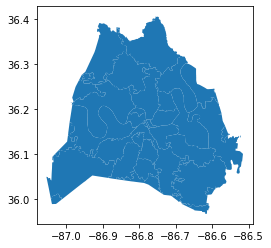

In [7]:
zipcodes.plot();

Add styling and legend

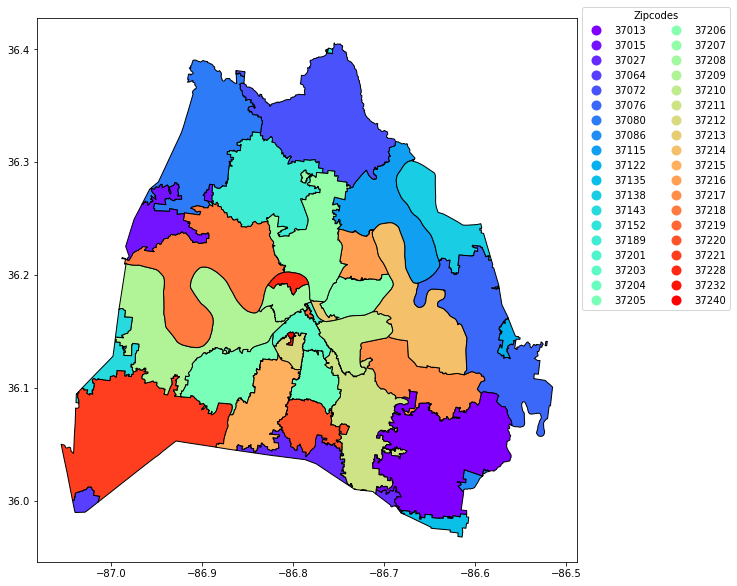

In [8]:
#geopandas handles legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'rainbow')
plt.show()

Because our trip data is a .csv file instead of a spatial geojson file, we need to first turn it into a GeoDataFrame before we can do a spatial join to our zipcode data and make cool plots.

Step 1 is to join the lat and long into a geometry column.

In [9]:
maytrips['geometry'] = maytrips.apply(lambda x: Point((x.startLongitude, 
                                                         x.startLatitude)), 
                                        axis=1)
maytrips.head(3)

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,geometry
0,2019-05-01 00:00:55.423000,Bird,BRD2134,Powered9EAJL,3.0000,958.00528,2019-05-01 00:00:00,00:00:20.460000,2019-05-01 00:00:00,00:02:52.346666,36.15710,-86.80360,36.15660,-86.80670,"[[36.157235,-86.803612],[36.157235,-86.80362],...",2019-05-02 05:30:23.780000,POINT (-86.8036 36.1571)
1,2019-05-01 00:03:33.147000,Lyft,LFT5,Powered296631,1.7156,1371.39112,2019-05-01 00:00:00,00:01:50.090000,2019-05-01 00:00:00,00:03:33.026666,36.15797,-86.77896,36.16054,-86.77689,"[[36.15797,-86.77896],[36.15795,-86.77873],[36...",2019-05-02 07:20:32.757000,POINT (-86.77896 36.15797)
2,2019-05-01 00:05:55.570000,Bird,BRD2168,Powered7S2UU,3.0000,2296.58800,2019-05-01 00:00:00,00:03:47.363333,2019-05-01 00:00:00,00:07:13.596666,36.15470,-86.78180,36.15650,-86.78680,"[[36.155068,-86.782124],[36.156597,-86.78675]]",2019-05-02 05:30:24.530000,POINT (-86.7818 36.1547)


Now we need to make the GeoDataFrame

In [10]:
maytrips_geo = gpd.GeoDataFrame(maytrips, 
                           crs = zipcodes.crs, 
                           geometry = maytrips['geometry'])

In [11]:
type(maytrips_geo)

geopandas.geodataframe.GeoDataFrame

Now let's clean up our data to just the columns we need before joining.

In [12]:
maytrips_geo = maytrips_geo[['companyName', 'tripRecordNum', 'sumdID', 'tripDuration', 'tripDistance', 'startDate', 'startTime', 'geometry']]

In [13]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

Now we'll try to do a spatial join of zipcodes with the May trip geometry.

In [14]:
maytrips_by_zip = gpd.sjoin(maytrips_geo, zipcodes, op = 'within')

In [15]:
maytrips_by_zip.head()

,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,geometry,index_right,zip,po_name
0,Bird,BRD2134,Powered9EAJL,3.0000,958.00528,2019-05-01 00:00:00,00:00:20.460000,POINT (-86.80360 36.15710),35,37203,NASHVILLE
1,Lyft,LFT5,Powered296631,1.7156,1371.39112,2019-05-01 00:00:00,00:01:50.090000,POINT (-86.77896 36.15797),35,37203,NASHVILLE
2,Bird,BRD2168,Powered7S2UU,3.0000,2296.58800,2019-05-01 00:00:00,00:03:47.363333,POINT (-86.78180 36.15470),35,37203,NASHVILLE
3,Bird,BRD2166,PoweredZIIVX,3.0000,1200.78744,2019-05-01 00:00:00,00:04:21.386666,POINT (-86.77950 36.14940),35,37203,NASHVILLE
5,Bird,BRD2167,PoweredEJF1K,3.0000,984.25200,2019-05-01 00:00:00,00:03:56.546666,POINT (-86.78620 36.15440),35,37203,NASHVILLE


In [16]:
maytrips_by_zip['zip'].value_counts()

37203    97496
37201    39847
37219    17858
37212    17020
37204    15713
37206     8866
37208     8725
37213     8710
37210     4870
37240     1605
37232     1379
37207     1086
37209      702
37215      330
37228      243
37216      206
37205      185
37211       42
37217       41
37214       15
37013       15
37218        5
37221        5
37115        3
37138        1
37220        1
Name: zip, dtype: int64

Busiest zipcode is West End/Gulch. Not really a surprise there!

In [17]:
maytrips_by_zip['startDate'].value_counts()

2019-05-26 00:00:00    14947
2019-05-25 00:00:00    14811
2019-05-18 00:00:00    12596
2019-05-04 00:00:00    10210
2019-05-27 00:00:00     9993
2019-05-19 00:00:00     9170
2019-05-17 00:00:00     9019
2019-05-24 00:00:00     8985
2019-05-05 00:00:00     8197
2019-05-31 00:00:00     7778
2019-05-11 00:00:00     7764
2019-05-03 00:00:00     7673
2019-05-12 00:00:00     7354
2019-05-10 00:00:00     6590
2019-05-06 00:00:00     6484
2019-05-16 00:00:00     6257
2019-05-20 00:00:00     5913
2019-05-07 00:00:00     5746
2019-05-28 00:00:00     5649
2019-05-23 00:00:00     5588
2019-05-08 00:00:00     5381
2019-05-14 00:00:00     5374
2019-05-30 00:00:00     5356
2019-05-15 00:00:00     5234
2019-05-13 00:00:00     5179
2019-05-22 00:00:00     5013
2019-05-21 00:00:00     4889
2019-05-29 00:00:00     4747
2019-05-01 00:00:00     4559
2019-05-02 00:00:00     4290
2019-05-09 00:00:00     4223
Name: startDate, dtype: int64

Two days in May with the highest number of scooter trips were the Saturday and Sunday of Memorial Day weekend. May 18th there was a 5K in East Nashville. May 4th was the Sevier Park Fest in 12 South. May 18 and 19 there was a free concert series in Centennial Park. Most of these Saturdays there were also soccer games.

Looking at trips per scooter. Over 2K trips where the scooter ID wasn't known/logged.

In [18]:
maytrips_by_zip['sumdID'].value_counts()

PoweredUNKNOWN                                 2166
Poweredb671ffe4-2bca-5880-98ec-d36f65aa11a2     600
PoweredWVIAXNCVDNOXP                            338
PoweredR3QXO6TL2HIAB                            291
PoweredRJ7YYJTHAR5N3                            274
                                               ... 
PoweredWJ84E                                      1
Powered7HKY5                                      1
Powered7463072                                    1
PoweredUZJGTVAABVMBK                              1
PoweredYY8GG                                      1
Name: sumdID, Length: 6966, dtype: int64

Looking at trips per each of the 7 scooter companies.

In [19]:
maytrips_by_zip['companyName'].value_counts()

Lime             102569
Lyft              54271
Bird              53496
SPIN               8471
Bolt Mobility      4912
Gotcha              650
JUMP                600
Name: companyName, dtype: int64

I really want to focus on looking at how many rides per day each individual scooter is averaging, since the stated project metric was a desired average of 3 rides per scooter per day. If I can figure out this info, then it will be possible to find areas where that average is being exceeded (and perhaps place more scooters in that area from other areas that aren't meeting the 3 rides per day metric).

In [20]:
maytrips_by_zip.describe()

,tripDuration,tripDistance,index_right
count,224969.000000,2.249690e+05,224969.000000
mean,42.701454,4.068519e+03,29.413430
std,270.980984,2.605852e+04,11.539298
min,0.000000,-2.758530e+06,0.000000
25%,5.050000,3.380232e+02,24.000000
50%,10.116667,1.640420e+03,35.000000
75%,20.000000,5.488845e+03,36.000000
max,36206.000000,7.580026e+06,53.000000


In [25]:
maytrips_by_zip['sumdID'].nunique()

6966